In [1]:
import sympy as sp  # Symbolic Math
import numpy as np  # Linear Algebra
import matplotlib.pyplot as plt  # Plotting
sp.init_printing()
%matplotlib inline

# Problem 1

### Governing Differential Equation

$$
-\frac{\text{d}}{\text{d}x}\left[ (1 + x) \frac{\text{d}u}{\text{d}x} \right] = 0 \quad \text{for} \quad 0 < x < 1 \\
u(0) = 0, ~~ u(1) = 1
$$

### Ritz Approximation
$$
u(x) \approx U_2 = \phi_0(x) + \sum_{i=1}^{2} \phi_i(x)c_i
$$
where
$$
\phi_0 = x, ~~ \phi_i = x^i(1 - x)
$$
The main goal is to find the coefficients $c_i$.
### Analytical Solution

$$
u(x) = \frac{\log(x + 1)}{\log(2)}
$$

In [2]:
# Load custom plotting config
execfile('../../matplotlibrc.py')

In [3]:
x = sp.symbols('x')

In [4]:
def phi(idx):
    return x**idx * (1 - x)

In [5]:
def dphi(idx):
    return idx*x**(idx - 1) - (idx + 1)*x**idx

In [6]:
def Kij(i,j):
    integrand = (1+x)*dphi(i)*dphi(j)
    return sp.integrate(integrand, (x, 0, 1))

In [7]:
def Fi(i):
    integrand = (1+x)*dphi(i)*1
    return sp.integrate(integrand, (x, 0, 1))

In [8]:
K = sp.zeros(2,2)
F = sp.zeros(2,1)
for i in range(2):
    F[i] = -Fi(i+1)
    for j in range(2):
        K[i,j] = Kij(i+1,j+1)
print("K = %s" % K)
print("F = %s" % F)

K = Matrix([[1/2, 17/60], [17/60, 7/30]])
F = Matrix([[1/6], [1/12]])


In [9]:
C = K.inv().dot(F)
print("C = %s" % C)

C = [55/131, -20/131]


In [10]:
u = sum([C[i]*phi(i+1) for i in range(2)]) + x
u.simplify()

In [11]:
X = np.linspace(0, 1)
uritz = sp.lambdify(x,u)(X)
ux = np.vectorize(sp.lambdify( x, sp.log(x + 1.)/sp.log(2.) ))(X)

In [12]:
err = 100*(uritz[1:] - ux[1:])/ux[1:]
maxerr = np.abs(err).max()

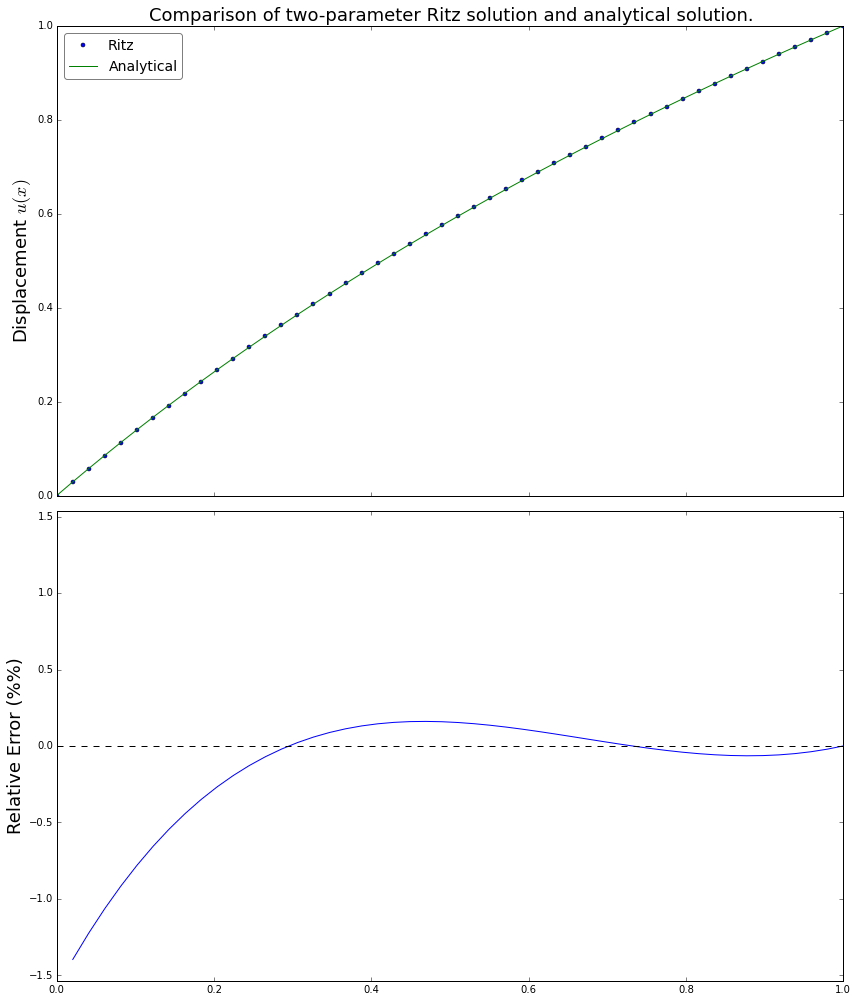

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,14))
ax1.plot(X, uritz, 'o', label='Ritz', ms=4)
ax1.plot(X, ux, label='Analytical')
ax1.legend(numpoints=1)
ax1.set_ylabel('Displacement $u(x)$')
ax1.set_title('Comparison of two-parameter Ritz solution and analytical solution.')
ax2.set_ylabel('Relative Error (%%)')
ax2.plot(X[1:], err)
ax2.plot((0, 1), (0, 0), 'k--')
ax2.set_ylim(-maxerr*1.1, maxerr*1.1)
fig.tight_layout()
plt.show()

The Ritz approximation yields a maximum relative error of about 1.5 %.